<a href="https://colab.research.google.com/github/karsarobert/Machine_learning_2024/blob/main/06/PTE_ML6_Feladatokkal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 6. Gyakorlat: Logisztikus regresszió, döntési fák
### 2024. március 12.

#Házi feladathoz segítség

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/melb_data.csv')

In [ ]:
for cname in data.columns:
   if data[cname].dtype == "object" :
     print(str(cname) +': '+ str(data[cname].nunique()))

In [ ]:
data.head()

#Logisztikus regresszió

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/diabetes.csv') # adatok betöltése

y = df.label #X,y beállítása
X= df.drop(['label'], axis = 1)
df


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) # tréning és validációs adatkészletek beállítása

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000) # logisztikus regressziós modell létrehozása
model.fit(X_train, y_train) # modell illesztése
y_pred=model.predict(X_test) # előrejelzések kiszámítása a teszt készleten


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # zavartsági mártix

pd.DataFrame(cnf_matrix)

In [ ]:
y_pred.sum()

In [ ]:
import seaborn as sns # zavartsági mátrix grafikon rajzolása

ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn tévesztési mátrix címkékkel\n\n');
ax.set_xlabel('\nElőre jelzett értékek')
ax.set_ylabel('Tényleges értékek ');

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Itt a + jelöli a beteget (1 logikai érték), a - az egészségeset (0 logikai érték)
<div class=mobile-container>
<table style="margin-left: 10%">
<colgroup><col width=120px>
<col width=50px>
<col width=200px>
<col width=200px>
</colgroup><tbody>
<tr style="border-top: 0px">
<td align=center colspan=2 rowspan=2 style="background: rgba(255, 255, 255, 1);border: 0px"></td>
<td align=center colspan=2 style="background: rgba(255, 255, 255, 1);border: 1px"><b>Prediktált</b> osztály (betegséget keresünk)</td>
</tr>
<tr style="border-top: 0px">
<td align=center style="background: rgba(255, 255, 255, 1);border: 0px"><b>+ (a modell szerint beteg)</b></td>
<td align=center style="background: rgba(255, 255, 255, 1);border: 0px"><b>- (a modell szerint egészséges)</b></td>
</tr>
<tr style="border-top: 0px">
<td align=center rowspan=2 style="border: 0px"><b>Tényleges</b> osztály</td>
<td align=center style="background: rgba(255, 255, 255, 1);border: 0px;"><b>+ (valóban beteg)</b></td>
<td align=center style="background: rgba(0, 255, 0, 0.15);border: 0px;"><b>TP</b><br>True Positives<br>a modell helyesen döntött</td>
<td align=center style="background: rgba(255, 0, 0, 0.25);border: 0px;"><b>FN</b><br>False Negatives<br>Type II error<br>a modell szerint egészséges, valójában beteg</td>
</tr>
<tr style="border-top: 0px">
<td align=center style="background: rgba(255, 255, 255, 1);border: 0px;"><b>- (valóban egészséges)</b></td>
<td align=center style="background: rgba(255, 0, 0, 0.25);border: 0px;"><b>FP</b><br>False Positives<br>Type I error<br>a modell szerint beteg, pedig egészséges</td>
<td align=center style="background: rgba(0, 255, 0, 0.15);border: 0px;"><b>TN</b><br>True Negatives<br>a modell helyesen döntött</td>
</tr>
</tbody>
</table>
</div>

</div>
<br>
<p><span class="new-item item-r">Főbb mérőszámok:</span> Az osztályozási modellek teljesítményének értékelésére általában a következő mérőszámokat használják:</p>
<div class=mobile-container>
<center>
<table>
<colgroup><col width=200px>
<col width=200px>
<col width=200px>

<tbody>
<tr>
<td align=center><b>Metrika</b></td>
<td align=center><b>Számítása                             </b></td>
<td align=center><b>Érelmezés</b></td>
</tr>
<tr>
<td align=center>Accuracy</td>
<td align=center>$\displaystyle\frac{\textrm{TP}+\textrm{TN}}{\textrm{TP}+\textrm{TN}+\textrm{FP}+\textrm{FN}}$</td>
<td align=left>A modell általános teljesítménye</td>
</tr>
<tr>
<td align=center>Precision</td>
<td align=center>$\displaystyle\frac{\textrm{TP}}{\textrm{TP}+\textrm{FP}}$</td>
<td align=left>Mennyire pontosak a pozitív előrejelzések</td>
</tr>
<tr>
<td align=center>Recall<br>Sensitivity</td>
<td align=center>$\displaystyle\frac{\textrm{TP}}{\textrm{TP}+\textrm{FN}}$</td>
<td align=left>A tényleges pozitív minta lefedettsége</td>
</tr>
<tr>
<td align=center>Specificity</td>
<td align=center>$\displaystyle\frac{\textrm{TN}}{\textrm{TN}+\textrm{FP}}$</td>
<td align=left>A tényleges negatív minta lefedettsége</td>
</tr>
<tr>
<td align=center>F1 score</td>
<td align=center>$\displaystyle\frac{2\textrm{TP}}{2\textrm{TP}+\textrm{FP}+\textrm{FN}}$</td>
<td align=left>Hibrid metrika hasznos a kiegyensúlyozatlan osztályok esetében</td>
</tr>
</tbody>
</table>
</center>
</div>

#Accuracy
Az Accuracy a helyes találatok arányát mutatja az összes objektumhoz viszonyítva, míg az
Error rate a helytelen találatok arányát az összes objektumhoz képest.
Az Accuracy és az Error rate nagyon általános mutatók, az alkalmazási terület sajátosságaira vonatkozóan nem mindig kellően informatívak. Nem használható e két kritérium akkor sem, ha a célosztály mérete kicsi a
teljes halmazhoz képest. Például egy ritka betegség esetén, ha 100 ezerből 10 személy
tartozik a becsült osztályba, akkor is 99.99%-os Accuracyt kapunk, ha egyszer sem találjuk
el a célosztályt, hiszen nagyon sok TN van!
#Sensitivity
A Sensitivityt valódi pozitív rátának is nevezik, mert a célosztályba helyesen besorolt objektumok arányát fejezi a ki az összes, valóban a célosztályba tartozó objektumhoz képest.
#Specifity
A Specificity pedig a valódi negatív ráta, mert a nem célosztályba helyesen besorolt objektumok arányát fejezi ki az összes valóban nem a célosztályba tartozó objektumhoz képest.
# A mutatók tágabb értelmezése
A Sensitivity a besorolás „agresszivitását” fejezi ki. Egy klasszifikáció „agresszív”, ha
minden, kicsit is „gyanús” megfigyelést a célosztályba sorol (pl. egy e-mail-folyam spam/nem
spam osztályozása, ahol minden, kicsit is spamgyanús levelet a modell a spam kategóriába
sorol), vagy nagyon konzervatív, amikor túl sok objektum (spam) átmegy a szűrőn.
A Precision a modell predikciós értéke, azt mutatja, hogy a modell mennyire korrektül
sorol be egy pozitív megfigyelést a pozitív célosztályba. Ha ez az érték alacsony, akkor túl
sok a tévedés, pl. egy keresőmotor esetén.
A Recall azt mutatja, hogy az eredmény mennyire teljes. Értéke ugyanaz, mint a
sensitivity értéke, csak más az értelmezése. Ha magas az értéke, akkor sok pozitív megfigyelés kap korrekt besorolást.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Sensitivity_and_specificity_1.01.svg/341px-Sensitivity_and_specificity_1.01.svg.png)

# Milyen metrikákkal lehet mérni a modell teljesítményét
https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

Képzeld el, hogy egy orvosi diagnosztikai tesztet vizsgálunk, amelynek célja a rák kimutatása. A teszt két eredményt adhat: pozitív (rák) vagy negatív (nem rák).

A valódi pozitív ráta (TPR) az a valószínűség, hogy a teszt helyesen azonosítja a rákos betegeket (azaz pozitív eredményt ad).
A hamis pozitív ráta (FPR) az a valószínűség, hogy a teszt tévesen azonosítja az egészséges embereket rákos betegként (azaz pozitív eredményt ad).

In [ ]:
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend(loc=4)
plt.show()


#A ROC-görbe
A ROC (Receiver Operating Characteristic) a valódi pozitívak aránya és a fals pozitívak
aránya közötti kapcsolatot jellemzi. Az elnevezést a radartechnológiában vezették be, a
valódi szignálok és a fals riasztások megkülönböztetésére szolgál.
Minthogy a tengelyeken használt mértékek ekvivalensek a Sensitivityvel és az
(1-Specificity)-vel, sensitivity/specificity diagramnak is nevezik.
Minél távolabb van a ROC-görbe a 45o-os egyenestől a felső háromszögben, annál hatékonyabbnak tartjuk a modellt.
A modell megfelelőségére jellemző az AUC (area under the curve) is, azaz a ROCgörbe alatti terület. Ha az AUC értéke 0.6, vagy kisebb, a modell gyakorlatilag nem ad jobb
eredményt, mint a random osztályozás. Úgy tekintjük, hogy a modell jól használható, ha az
AUC-érték 0.9–1 között van.

#Feladat
Készítsen logisztikus regresszort  egy osztályozási feladatra!
Az X, y adatok adottak az alábbiak szerint

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris() #iris dataset betöltése
X = iris.data[:, [2, 3]]
y = iris.target


#Ossza fel az adatokat 60-40% ban

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(...)

#Hozzon létre egy modellt
LogisticRegression, solver='lbfgs', max_iter=100 paraméterekkel
A teszt adatok alapján számolja kia modell az előrejelzéseket

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=100)
model.fit)
y_pred=model.predict()
y_pred

#Rajzolja ki a zavartsági mátrixot

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix()

pd.DataFrame()

In [ ]:
import seaborn as sns # zavartsági mátrix grafikon rajzolása

ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn tévesztési mátrix címkékkel\n\n');
ax.set_xlabel('\nElőre jelzett értékek')
ax.set_ylabel('Tényleges értékek ');

#Számolja ki a modell pontosságát

In [ ]:
print("Accuracy:",metrics.accuracy_score(...))


In [ ]:
#több osztály esetén
from sklearn import metrics
print(metrics.classification_report(...))

# Döntési fák
Az unokatestvéred dollármilliókat keresett ingatlanspekulációval. Felajánlotta, hogy az adattudományok iránti érdeklődésed miatt üzleti partnered lesz. Ő adja a pénzt, te pedig olyan modelleket, amelyek megjósolják, mennyit érnek a különböző házak.

Megkérdezed az unokatestvéredet, hogyan jósolta meg az ingatlanok értékét a múltban. mire ő azt mondja, hogy ez csak megérzés. De további kérdezősködéssel kiderül, hogy a múltban látott házakból ármintákat azonosított, és ezeket a mintákat használja arra, hogy előrejelzéseket készítsen az új házakra, amelyeket fontolóra vesz.

A gépi tanulás ugyanígy működik.  A döntési fának nevezett modellel kezdjük. Vannak bonyolultabb modellek, amelyek pontosabb előrejelzéseket adnak. De a döntési fák könnyen érthetőek, és az adattudomány legjobb modelljeinek néhány alapépítőelemét képezik.

Az egyszerűség kedvéért a lehető legegyszerűbb döntési fával kezdünk.

![First Decision Trees](http://i.imgur.com/7tsb5b1.png)

A házakat csak két kategóriába sorolja. A vizsgált házak előre jelzett ára az ugyanabba a kategóriába tartozó házak történelmi átlagára.

Az adatok alapján döntjük el, hogy a házakat két csoportra bontjuk, majd ismét az egyes csoportok előre jelzett árát határozzuk meg.  Az adatokból történő mintázatok megragadásának ezt a lépését **illesztésnek** vagy **modellképzésnek** nevezzük. A modell **illesztéséhez** használt adatokat **tréningadatoknak** nevezzük.  

A modell illesztésének részletei (pl. az adatok felosztásának módja) elég bonyolultak ahhoz, hogy ezt későbbre tartogassuk. A modell illesztése után a modellt új adatokra alkalmazhatja, hogy **megjósolja** további lakások árait.

---
# A döntési fa javítása
Az alábbi két döntési fa közül melyik az, amelyik nagyobb valószínűséggel adódik az ingatlanok képzési adatainak illesztéséből?

![First Decision Trees](http://i.imgur.com/prAjgku.png)


A bal oldali döntési fának (1. döntési fa) valószínűleg több értelme van, mert azt a valóságot tükrözi, hogy a több hálószobás házak általában magasabb áron kelnek el, mint a kevesebb hálószobásak.  Ennek a modellnek a legnagyobb hiányossága, hogy nem ragadja meg a legtöbb, a ház árát befolyásoló tényezőt, például a fürdőszobák számát, a telekméretet, a helyszínt stb.

Több tényezőt lehet megragadni egy olyan fával, amely több "elágazással" rendelkezik. Ezeket a fákat "mélyebb" fáknak nevezik. Egy olyan döntési fa, amely az egyes házak telkének teljes méretét is figyelembe veszi, így nézhet ki:
![Depth 2 Tree](http://i.imgur.com/R3ywQsR.png)

Bármely ház árát megjósolhatja a döntési fa végigkövetésével, mindig az adott ház jellemzőinek megfelelő utat választva. A ház megjósolt ára a fa alján található.  Az alján lévő pontot, ahol az előrejelzést készítjük, **levélnek** nevezzük.   

A leveleknél lévő osztásokat és értékeket az adatok fogják meghatározni, ezért itt az ideje, hogy megnézze az adatokat, amelyekkel dolgozni fog.



#Egy másik példa a hirdetésekkel kapcsolatos átkattintásokról
Az alábbi ábrán látható leegyszerűsített forgatókönyvben, ahol egy önvezető autóhirdetésre kattintást vagy nem kattintást szeretnénk megjósolni, manuálisan készíthetünk egy döntési fa osztályozót, amely egy rendelkezésre álló adathalmazra működik. Ha például egy felhasználó érdeklődik a technológia iránt, és van autója, akkor hajlamos lesz rákattintani a hirdetésre; egy ezen az alhalmazon kívüli személy, például egy magas jövedelmű nő, nem valószínű, hogy rákattint a hirdetésre. Ezután a betanított fát arra használjuk, hogy két új bemenetet jósoljunk, amelyek eredménye a Kattintás és a Nem kattintás:

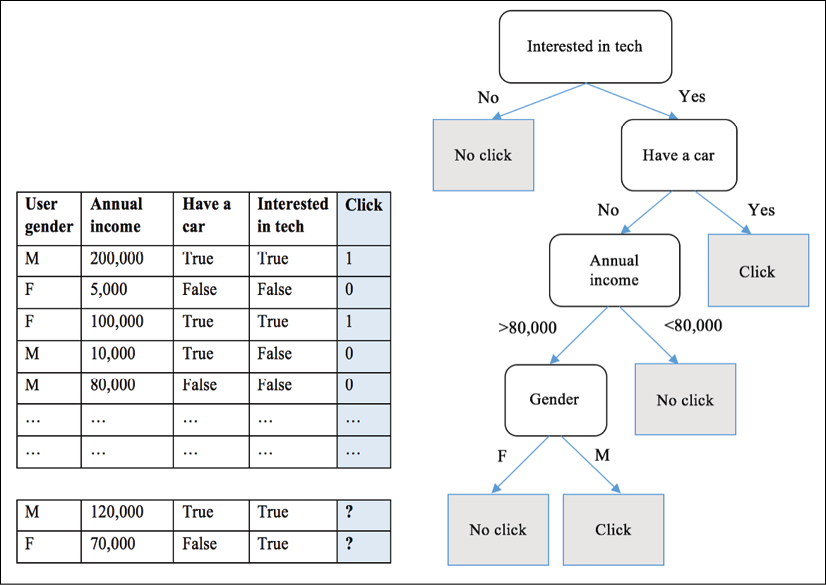

#Döntési fa algoritmusok
A döntési fának három alapvető összetevője van: a belső csomópont, az ág és a levélcsomópontok. Itt minden egyes végcsomópont egy jellemzőt, az ág a döntési szabályt vagy a felosztási szabályt, a levél pedig az előrejelzés eredményét adja. A fa első kezdő- vagy főcsomópontja a gyökércsomópont. Ez osztja fel az adatokat a jellemzők vagy attribútumértékek alapján. Itt az adatokat felosztjuk, és a fennmaradó adatokat ismét rekurzívan felosztjuk, amíg az összes elem ugyanarra az osztályra nem utal, vagy nem marad több oszlop. A döntési fák mindkét típusú problémában alkalmazhatók: osztályozásban és regresszióban. Rengeteg döntési fa algoritmus áll rendelkezésre, például a CART, az ID3, a C4.5 és a CHAID. Itt azonban elsősorban a CART-ra és az ID3-ra koncentrálunk, mert a scikit-learnben ez a kettő áll rendelkezésre. Lássuk a döntési fa osztályozó generálásának folyamatát a következő ábrán:
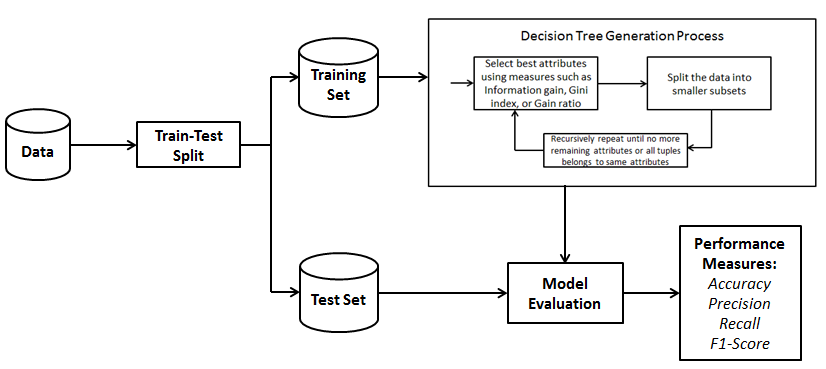

# Nézzünk egy egyszerű példát!

In [ ]:
import numpy as np
import pandas as pd
# hozzunk létre egy dataframet amely 3 oszlopot tartalmaz x1, x2, y
df_tree = pd.DataFrame(
    {
        'x1': [6,4,6,10,5,8,3],
        'x2': [8,11,12,9,7,9,11],
        'y': [1,0,0,1,0,1,0],
    }
)
df_tree


In [ ]:
X = df_tree[['x1','x2']] # X, és y beállítása
y = df_tree['y']
#X.to_numpy()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

model = DecisionTreeClassifier(max_depth = 3, random_state=0) # hozzunk létre egy döntési fa modellt

#próbáljuk ki hogy változik a döntés a fa mélységének növelésével

#tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,  random_state=1)
model.fit(X, y) # a döntési fák nem érzékenyek az adatok nagyságára itt nem kell normalizálni, standardizálni az adatokat


In [ ]:
n_classes = 2
plot_colors = "br"
plot_step = 0.02

x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.values[idx, 0], X.values[idx, 1], c=color, label=y[i],
                    cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.legend()
plt.show()

In [ ]:
xx

In [ ]:
from sklearn import tree
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(model, out_file=None,feature_names= X.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
from sklearn.tree import plot_tree
plt.figure()
plot_tree(model, filled=True)
plt.title("Döntési fa")
plt.show()

#Döntési fa felosztási algoritmus
Tegyük fel, hogy 20 diák adatai vannak, akik közül 10-en kriketteznek, 10-en pedig nem.  Tehát itt a piros plusz jel azt a diákot jelöli, aki krikettezik, a zöld negatív pedig azt, aki nem krikettezik.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/02/Screenshot-from-2021-02-22-18-29-50-768x266.png)

Most már a következő jellemzői vannak a diákoknak

##Döntési fa felosztás - A diákok magassága alapján
Teljesítmény- Az osztályban nyújtott teljesítményükből megtudhatjuk, hogyan teljesítettek a diákok az osztályban végzett teszteken.
Osztály- Végül az osztályuk, amely alapvetően a diák jelenlegi osztályát határozza meg.
Ezeknek a jellemzőknek a segítségével szeretnénk egy modellt képezni, és megjósolni, hogy krikettezni fognak-e vagy sem. Ha most megnézzük a rendelkezésünkre álló adatokat, összesen 20 diákunk van, akik közül 10 krikettezik, és így a krikettező diákok aránya 50%.  A diákokra vonatkozóan olyan jellemzőkkel rendelkezünk, mint a magasság, az osztályban nyújtott teljesítmény és az, hogy melyik osztályba tartoznak.

A tanár most az alcsoportokat akarja azonosítani. Ezek az alcsoportok a megadott jellemzők alapján nagyon hasonlóak abban a tekintetben, hogy kriketteznek-e vagy sem.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/02/Screenshot-from-2021-02-22-18-36-15.png)

##Döntési fa felosztás - Teljesítmény alapján
Próbáljuk ki először egy másik változóval. Osszuk fel a populációt a teljesítmény alapján. Itt a teljesítményt átlagon felüli vagy átlag alatti teljesítményként határozzuk meg. Ismét felosztjuk a populációt ezen kategóriák alapján, és mondjuk, hogy egy ilyen eloszlást kapunk.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/02/Screenshot-from-2021-02-22-18-39-06.png)

##Döntési fa osztás - osztály alapján
Végül, van még egy változó, az osztály, és így a teljes adatot az osztályra is feloszthatjuk. Tegyük fel, hogy az adatokban szereplő diákok a 9. vagy a 10. osztályba tartoznak, és így ezeket használhatjuk kategóriaként az adatok felosztásához. A felosztás után ezt az eloszlást kapjuk.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/02/Screenshot-from-2021-02-22-18-41-05.png)

A 9. osztályban sok diák krikettezik, míg a 10. osztályban már kevesebben. Lehet, hogy a 10. osztályos tanulók a vizsgáikkal vannak elfoglalva, de ennek számos oka lehet. Nézzük a számokat és a százalékos arányokat, adatainkban 10 diák van a 9. osztályból és 10 a 10. osztályból. A 9. osztályban a 10-ből 8 tanuló krikettezik, ami pontosan 80%, míg a 10. osztályban csak 2 tanuló krikettezik, ami 20%.

Így oszthatjuk fel az adatokat a rendelkezésünkre álló jellemzők alapján. Ha észrevetted volna, eddig három különböző döntési fát hoztunk létre.  Minden alkalommal a teljes adatot két részhalmazra osztottuk bizonyos feltételek vagy döntések alapján, és így kaptunk egy döntési fát.

Amint látta, eddig három döntési fánk van, e három döntési fa közül Ön szerint melyik a jobb? vagy mondhatjuk, hogy melyik ad nagyobb bizalmat a tanárnak, miközben megjósolja a diákok viselkedését, hogy kriketteznek-e vagy sem. A döntési fáknál azt szeretnénk, hogy olyan döntésünk legyen, amely képes elkülöníteni az osztályokat, ami a mi esetünkben az- hogy a diák krikettezik-e vagy sem. Tehát azt akarjuk, hogy az összes pozitívum az egyik oldalon vagy az egyik csomóponton legyen, az összes negatívum pedig a másik csomóponton.

Ön szerint e három forgatókönyv közül melyik a legjobb felosztás, gondolkodjon el rajta egy pillanatra, mielőtt továbblépnénk. Oké, ha megnézzük a harmadik döntési fán az osztály szerinti felosztást, akkor a krikettjátékos diákok 80%-át különítette el, ami több, mint a másik két felosztás bármelyikében. Tehát azt mondhatjuk, hogy az osztály szerinti felosztás jobb a többi felosztásnál, mivel szinte tiszta csomópontokat eredményezett.



#Gini szennyeződés:
Döntési fa algoritmus a legjobb felosztás kiválasztására
Több algoritmus létezik, amelyeket a döntési fa használ a probléma legjobb felosztásának eldöntésére. Nézzük először a legelterjedtebbet és legnépszerűbbet mind közül, ami a Gini Impurity. Ez a csomópontok szennyeződését méri, és a következőképpen számítjuk ki:

#Döntési fa legjobb felosztás - gini impurity

Először is értsük meg, hogy mi az a Gini, majd megnézzük hogyan lehet kiszámítani a Gini impurityt a felosztáshoz, és eldönteni a megfelelő felosztást. Tegyük fel, hogy van egy csomópontunk, mint ez:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-34-52-300x179.png)


Tehát a Gini azt mondja, hogy ha véletlenszerűen kiválasztunk két pontot a populációból, az itt rózsaszínnel kiemelteket, akkor azoknak ugyanabból az osztályból kell származniuk. Tegyük fel, hogy van egy teljesen tiszta csomópontunk -

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-34-59-300x191.png)

Ki tudod találni, hogy mi lenne a valószínűsége annak, hogy egy véletlenszerűen kiválasztott pont ugyanabba az osztályba tartozik? Nos, nyilvánvalóan 1 lesz, hiszen itt minden pont ugyanabba az osztályba tartozik. Tehát mindegy, hogy melyik két pontot választottuk ki, azok mindig ahhoz az egy osztályhoz fognak tartozni, és így a valószínűség mindig 1 lesz, ha a csomópont tiszta. És ez az, amit a Gini segítségével el akarunk érni.

A Gini értéke nullától egyig terjed, mivel ez egy valószínűség, és minél magasabb ez az érték, annál tisztábbak a csomópontok. És természetesen a kisebb érték kevesebb tiszta csomópontot jelent.

#A Gini szennyeződés tulajdonságai
Nézzük meg a tulajdonságait, mielőtt ténylegesen kiszámítjuk a Gini impurityt, hogy eldöntsük a legjobb felosztást.

A legjobb felosztást a Gini impurity alapján döntjük el, és ahogyan azt korábban már megbeszéltük, a Gini impurity a következő:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-34-04-300x66.png)


Itt a Gini a tisztaságot jelöli, és így a Gini impurity a csomópontok szennyezettségéről árulkodik. Ha a Gini impurity alacsonyabb, akkor biztonsággal következtethetünk arra, hogy a tisztaság nagyobb lesz, és így nagyobb az esélye a csomópontok homogenitásának.

A Gini csak azokban a forgatókönyvekben működik, ahol kategorikus adatokkal rendelkezünk. Folytonos adatok esetén nem működik.

Nagyon fontos megjegyezni, tartsuk szem előtt. Ha például a ház árát vagy a bérelt kerékpárok számát szeretnénk megjósolni, a Gini nem a megfelelő algoritmus. Csak bináris felosztásokat végez vagy igen vagy nem, siker vagy kudarc, és így tovább. Tehát egy csomópontot csak két alcsomópontra fogja felosztani.

A Gini impurity kiszámításának lépései egy osztás esetében
Nézzük most a Gini-felosztás kiszámításának lépéseit. Először is kiszámítjuk a Gini impurityt az alcsomópontok számára, mivel a Gini impurityt már megnéztük, és biztos vagyok benne, hogy ezt mostanra már tudja:

#Gini impurity = 1 - Gini

Itt az egyes osztályok valószínűségeinek négyzetösszege, és a következőképpen adódik:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-38-59-300x53.png)

A Gini valószínűségek négyzetösszege, amennyiben n osztály van.

Miután kiszámítottuk az alcsomópontok Gini impurityjét, kiszámítjuk a felosztás Gini impurityjét az adott felosztás mindkét alcsomópontjának súlyozott impurityje segítségével. Itt a súlyt a minták megfigyeléseinek száma határozza meg mindkét csomópontban. Nézzük meg ezeket a számításokat egy példán keresztül, amely segít még jobban megérteni a dolgot.

A példaadatok:
Height- A diákok magassága
Performance-  Az osztályban nyújtott teljesítményük elárulja, hogyan teljesítettek a diákok az osztályban végzett teszteken
Class- Végül az osztályuk, amely alapvetően meghatározza a diák jelenlegi osztályát

Az osztályteljesítményen belüli felosztásnál emlékszik, hogy így történt a felosztás?

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-39-47.png)

Osztályon belüli teljesítmény megosztva

Két kategóriánk van, az egyik az "átlagon felüli", a másik az "átlag alatti". Ha az átlagon felüliekre koncentrálunk, akkor 14 diákunk van, akik közül 8-an kriketteznek, 6-an pedig nem. A krikettezés valószínűsége 8 osztva 14-gyel, ami körülbelül 0,57, és hasonlóképpen, a nem krikettezés valószínűsége 6 osztva 14-gyel, ami körülbelül 0,43 lesz. Itt az egyszerűség kedvéért a pontos szám helyett felfelé kerekítettem a számításokat.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-41-13-e1616407977480.png)

Hasonlóképpen, ha az átlag alatti értéket nézzük, kiszámítottuk az összes számot, és itt vannak - a játék valószínűsége 0,33, a nem játéké pedig 0,67 -.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-41-25-e1616408089843.png)

Most számoljuk ki az alcsomópontok Gini-tisztaságát az átlag feletti értékre, és itt van a számítás:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-45-19.png))

Ez lesz, egy mínusz a siker valószínűségének négyzete az egyes kategóriák esetében, ami 0,57 a krikettjátékosok esetében és 0,43 a nem krikettjátékosok esetében. A Gini tehát e számítás után 0,49 körüli értéket kap. Az átlag alatti csomópont ugyanazt a számítást végzi, mint a Gini. Az átlag alattiak esetében:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-45-28.png)

Ez körülbelül 0,44. Tartsunk egy kis szünetet, és elemezzük ezeket a számokat.

Most, hogy kiszámítsuk a felosztás Gini-szennyezettségét, mindkét csomópont súlyozott Gini-szennyezettségét vesszük, az átlag feletti és az átlag alatti értéket. Ebben az esetben egy csomópont súlya az adott csomópontban lévő minták száma osztva a szülő csomópontban lévő minták teljes számával. Tehát itt az átlag feletti csomópont esetében a súly 14/20 lesz, mivel az összes 20 diák közül 14 diákunk átlagon felül teljesített.

Az átlag alatti csomópont súlya pedig 6/20. Tehát a súlyozott Gini-szennyezettség az adott csomópont súlyának és a csomópont Gini-szennyezettségének a szorzata lesz. A súlyozott Gini-tisztátalanság az osztálymegosztásban nyújtott teljesítményre a következő:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-49-28.png)

Hasonlóképpen, itt is megragadtuk a Gini tisztázatlanságot az osztály szerinti felosztáshoz, ami körülbelül 0,32-nek felel meg.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-50-25-300x247.png)

Most, ha összehasonlítjuk a két Gini-szennyeződést az egyes felosztásoknál-

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-45-46.png)

Láthatjuk, hogy a Gini-tisztaság az Osztályra vonatkozó megosztás esetében kisebb. Ezért az osztály lesz az első osztás ezen a döntési fán.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-22-15-54-22-768x543.png)

Osztályonként megosztva

Hasonlóképpen, minden egyes osztás esetében kiszámítjuk a Gini szennyeződéseket, és a legkisebb Gini szennyeződést eredményező osztást választjuk ki osztásként. És tudod, hogy a Gini impurity minimális értéke azt jelenti, hogy a csomópont tisztább és homogénebb lesz.



#Feladat
A diabetes adatkészletet felhasználva döntési fával készítsen modellt

In [ ]:
import pandas as pd

# Load data using read_csv()
df = pd.read_csv("https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/diabetes.csv")

y =
X=
df.head()

#Adatok felosztása 80-20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(...)
X_train.head()

#DecisionTreeClassifier modell létrehozása, illeztése
max_depth paraméter kezdetben legyen 3

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 20, random_state=1)
model.fit(...)


#Számítsa ki a modell segítségével a teszt adatokhoz tartozó előrejelzéseket

In [ ]:
y_test_pred = model.predict(...)


#Számítsa ki a tévesztési (zavartsági) mátrixot

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cnf_matrix = confusion_matrix(...)

In [ ]:
import seaborn as sns

ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
ax.set_title('Zavartsági mátrix\n\n');
ax.set_xlabel('\nElőre jelzett értékek')
ax.set_ylabel('Tényleges értékek ');


#Számítsa ki a modell pontosságát
a logisztikus regresszióval ez 82 % volt

In [ ]:
accuracy_score(...)

In [ ]:
from sklearn.tree import plot_tree
plt.figure()
plot_tree(model, filled=True)
plt.title("Döntési fa")
plt.show()

# Összetettebb feladat megoldása döntési fával

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/Movie_classification.csv", header=0)
df.head()


In [ ]:
df.info() # vannak hiányzó adatok!

In [ ]:
df['Time_taken'].mean()

In [ ]:

df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True) # hiányzó adatok pótlása egy másik módszerrel
df.info()

In [ ]:
df.head() # keressünk kategórikus oszlopokat

In [ ]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True) # pd dummies segítségével hasonló a one-hot encoding hoz
df.head()

In [ ]:
X = df.drop(['Start_Tech_Oscar'], axis = 1) # X,y beállítása
y = df["Start_Tech_Oscar"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0) # adatok felosztása 80-20 %
X_train.head()

In [ ]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 20)
clftree.fit(X_train, y_train)

In [ ]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)
y_test_pred

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_train, y_train_pred) # a tréning adatok zavartsági mátrixa ezt csak a túlillesztés miatt számoljuk ki!

In [ ]:
confusion_matrix(y_test, y_test_pred) # a teszt adatok zavartsági mátrixa EZ A LÉNYEGES ismeretlen adatokon így teljesít a modell!


In [ ]:
accuracy_score(y_test, y_test_pred) # modell pontossága

In [ ]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

# Hiperparaméterek hangolása gridsearch segítségével

In [ ]:
from sklearn.model_selection import GridSearchCV # paraméterek hangolása
rf_clf = tree.DecisionTreeClassifier()
params_grid = {"max_depth" : [3,4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10, 20],
              }
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X, y)

![](https://stanford.edu/~shervine/teaching/cs-229/illustrations/cross-validation-en.png?0f7ada4dc141d0af6b12bb21cc431471)

##Hiperparaméterek
criterion : {"gini", "entropia", "log_loss"}, default="gini"
    A felosztás minőségének mérésére szolgáló függvény. A támogatott kritériumok a következők
"gini" a Gini-tisztasághoz, valamint a "log_loss" és az "entropia" a Gini-tisztasághoz.
Shannon információnyereség, lásd tree_matematical_formulation.

splitter : {"best", "random"}, alapértelmezett="best"
    Az egyes csomópontoknál a felosztás kiválasztására használt stratégia. Támogatott
stratégiák: "best" a legjobb felosztás kiválasztásához és "random" a legjobb felosztás kiválasztásához.
a legjobb véletlenszerű felosztás kiválasztásához.

max_depth : int, alapértelmezett=None
    A fa maximális mélysége. Ha nincs, akkor a csomópontok addig bővülnek, amíg
amíg minden levél tiszta, vagy amíg minden levél kevesebbet nem tartalmaz, mint
min_samples_split minták.

min_samples_split : int vagy float, alapértelmezett=2
    Egy belső csomópont felosztásához szükséges minták minimális száma:


Ha int, akkor a min_samples_split értéket tekintsük minimális számnak.

Ha float, akkor a min_samples_split egy tört és
ceil(min_samples_split * n_samples) a minimális érték.
minták száma minden egyes felosztásnál.


min_samples_leaf : int vagy float, alapértelmezett=1
    A minták minimális száma, amely szükséges ahhoz, hogy egy levélcsomópontban legyen.
Egy bármilyen mélységű osztási pont csak akkor lesz figyelembe véve, ha a következő ponton lép ki
legalább min_samples_leaf képzési mintákat hagy mind a bal, mind a bal oldali és a bal oldali
jobb ágon.  Ennek hatására a modell kisimulhat,
különösen regresszió esetén.

In [ ]:
grid_search.best_params_

In [ ]:
cvrf_clf = grid_search.best_estimator_
accuracy_score(y_test, cvrf_clf.predict(X_test))

In [ ]:
cvrf_clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(cvrf_clf, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

#Forrás
https://www.analyticsvidhya.com/blog/2021/02/how-to-split-decision-tree-the-pursuit-to-achieve-purity/